<a href="https://colab.research.google.com/github/Rashi2011/Rashi-Madhukar/blob/master/Programs%20in%20Tensorflow/Tweet_Sentiment_TF_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import torch
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
#Load data 
from google.colab import files
uploaded = files.upload()
#Import the data
import io
dataset = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train.csv


In [ ]:
############# Preprocessing the training set ##########################
dataset = pd.DataFrame(dataset,columns = ['text','sentiment'])
data = dataset.dropna()

X = data['text'].str.lower()                    #Array
Y = data["sentiment"]                 #Series

#Label Encoder                 
from sklearn.preprocessing import LabelEncoder
lb  = LabelEncoder()
Y = lb.fit_transform(Y)
print(type(X),type(Y))
print(X.shape,Y.shape)


<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
(27480,) (27480,)


In [ ]:
#uploading test set
uploaded = files.upload()
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv


<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
(3534,) (3534,)
7781 8582 11117


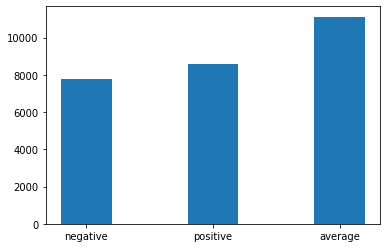

In [ ]:
################### Test data Preprocessing ##############
X_test = test['text'].str.lower()
Y_test = test['sentiment']

#Label Encoding
Y_test = lb.fit_transform(Y_test)
print(type(X_test),type(Y_test))
print(X_test.shape, Y_test.shape)

#Plotting the labellings
%matplotlib inline 
import matplotlib.pyplot as plt
negative = 0
positive = 0
average = 0
for i in range(len(Y)):
  if Y[i] == 0:
    negative+=1
  elif Y[i] == 1:
    average+=1
  elif Y[i] == 2:
    positive+=1
print(negative,positive,average)
data = { 'negative' : negative,'positive':positive, 'average': average}
columns = list(data.keys())
values = list(data.values())
plt.bar(columns,values,width = 0.4)
plt.show()

In [ ]:

######################################## clean txt for Training Data ##############################################
import re
import string
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
wn = WordNetLemmatizer()
def clean_txt(txt):
  txt = "".join([c for c in txt if c not in string.punctuation])
  tokens = re.split("\W+",txt)
  txt = ([wn.lemmatize(words) for words in tokens if words not in stopwords]) 
  txt_ = ([ps.stem(words) for words in txt])
  return txt_

clean_txt = list(map(clean_txt,X))
print(clean_txt)

####################################### Clean txt for test_data #################################################
def clean_txt_test(txt):
  txt = "".join([c for c in txt if c not in string.punctuation])
  tokens = re.split("\W+",txt)
  txt = ([wn.lemmatize(words) for words in tokens if words not in stopwords])
  txt_ = ([ps.stem(words) for words in txt])
  return txt_

clean_txt_test = list(map(clean_txt_test,X_test))
print(clean_txt_test[0])


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
[['', 'id', 'respond', 'go'], ['', 'sooo', 'sad', 'miss', 'san', 'diego'], ['bo', 'bulli'], ['', 'interview', 'leav', 'alon'], ['', 'son', 'couldnt', 'put', 'releas', 'alreadi', 'bought'], ['httpwwwdothebouncycomsmf', 'shameless', 'plug', 'best', 'ranger', 'forum', 'earth'], ['2am', 'feed', 'babi', 'fun', 'smile', 'coo'], ['soooo', 'high'], [''], ['', 'journey', 'wow', 'u', 'becam', 'cooler', 'hehe', 'possibl'], ['', 'much', 'love', 'hope', 'reckon', 'chanc', 'minim', 'p', 'im', 'never', 'gonna', 'get', 'cake', 'stuff'], ['realli', 'realli', 'like', 'song', 'love', 'stori', 'taylor', 'swift'], ['sharpi', 'run', 'danger', 'low', 'ink'], ['want', 'go', 'music', 'tonight', 'lost', 'voic'], ['test', 'test', 'lg', 'env2'], ['uh', 'oh', 'sunburn'], ['', 'sok', 'tri', 'plot', 'altern', 'speak', 'sigh'], ['ive', 'sick', 'past', 'day', 'thu', 'hair', 'look', 'wierd', 'didnt', 'hat', 'would', 'look', 'httptinyurlcommn

In [ ]:

######################################## Word2vec Vectorization###################################### 
import gensim 
from gensim.models import Word2Vec

word2vec = Word2Vec(clean_txt,size = 1000,window = 10, min_count=1)

vocabulary = word2vec.wv.vocab
print(vocabulary)
word2vec.most_similar("happi")

{'': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf42c50>, 'id': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf428d0>, 'respond': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf41f98>, 'go': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf41dd8>, 'sooo': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf41da0>, 'sad': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf41cc0>, 'miss': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf41c18>, 'san': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf41b38>, 'diego': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf41898>, 'bo': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf415f8>, 'bulli': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf40f28>, 'interview': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf40e48>, 'leav': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf3ea58>, 'alon': <gensim.models.keyedvectors.Vocab object at 0x7fd20cf3ebe0>, 'son': <gensim.models.keyedvectors.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('4th', 0.9996219277381897),
 ('war', 0.9996148347854614),
 ('leigh', 0.9987337589263916),
 ('hallmark', 0.9983258247375488),
 ('day', 0.9977525472640991),
 ('greatest', 0.997730016708374),
 ('yaa', 0.997348964214325),
 ('rail', 0.9970376491546631),
 ('bedgotta', 0.9969878792762756),
 ('mothersday', 0.9968013763427734)]

In [ ]:

#################Tokenize using Tensorflow which involves all preprocessing steps in one #################
from tensorflow.keras.preprocessing.text import Tokenizer
import gensim
#for train set
tokenize = Tokenizer()
tokenize.fit_on_texts(clean_txt)

vocab_size = len(tokenize.word_index) + 1
print("Total words in training dataset : ", vocab_size)


######################### text to sequence #################################
#for train set
sequence = tokenize.texts_to_sequences(X)
print("sequence of training dataset",sequence)
#for test set
sequence_test = tokenize.texts_to_sequences(X_test)
print("sequence of test dataset", sequence_test)

######################### padding the sequnece################################
from tensorflow.keras.preprocessing.sequence import pad_sequences
#for training set
padded = pad_sequences(sequence,maxlen = 10,padding = 'post')
print("padded",padded)

#for test set
padded_test = pad_sequences(sequence_test,maxlen =10, padding = "post")
print("padded_test", padded_test)


Total words in training dataset :  23930
sequence of training dataset [[7224, 2887, 6376, 12022, 7224], [328, 59, 7224, 2596, 20, 3725, 1345, 4521, 1178, 1985], [8023, 6272], [275, 858, 6272], [5048, 15841, 193, 11184, 9586, 454], [6338, 2428, 8346, 11184, 96, 1743, 1179], [2973, 11184, 52, 3840, 209, 8708], [468, 449], [3725], [1860, 179, 11, 2974, 436, 49], [40, 7224, 8, 19800, 9396, 7224, 2975, 11184, 340, 7224, 1292, 106, 69, 5, 501, 220], [7224, 9, 11184, 147, 8, 928, 1986], [790, 4533], [7224, 18, 19800, 3, 19800, 228, 62, 16325, 7224, 226], [409, 409, 11184, 3814, 8347], [1502, 39, 7224, 9030], [2277, 111, 19800, 2674, 9586, 883, 491], [7224, 126, 11184, 505, 232, 10190, 5774, 12022, 7224, 65, 6376, 1328, 54, 35, 6338, 2428], [24, 34, 69, 20, 11834, 15], [13972, 49, 3725], [39, 7224, 1292, 12105, 7224, 29, 3725, 132, 105, 75, 75], [1744, 11184, 33, 8351, 1393, 8352, 1134, 172, 23736, 5048, 60, 19800, 6376, 2976, 1393], [11184, 1174, 202, 12], [233, 4534, 7224, 143, 2977, 19800, 

In [ ]:
################################# Embedding Matrix #################################################
embedding_matrix = np.zeros((vocab_size,1000))
for word,i in tokenize.word_index.items():
  if word in word2vec.wv:
    embedding_matrix[i] = word2vec.wv[word]
print(embedding_matrix.shape)

################################### Embedding layer ####################################################
embedding_matrix

(23930, 1000)


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.1040891 , -0.52562392,  0.40322152, ..., -0.31243739,
         0.16978571,  0.32710505],
       [-0.10515444, -0.56689662,  0.39482895, ..., -0.31870523,
         0.18739505,  0.34703404],
       ...,
       [-0.00207315, -0.00788178,  0.0057914 , ..., -0.00485502,
         0.0030189 ,  0.00481482],
       [-0.00100048, -0.00628766,  0.0035193 , ..., -0.00227705,
         0.00170203,  0.00324147],
       [-0.00081551, -0.00642485,  0.00374053, ..., -0.00268631,
         0.00128427,  0.00351689]])

In [ ]:
#Defining the model
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size,1000, weights=[embedding_matrix], input_length=10),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(64,activation = 'relu'),
                             tf.keras.layers.Dense(3,activation = 'softmax')
                             ])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 1000)          23930000  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               545280    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 24,483,731
Trainable params: 24,483,731
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

In [ ]:
#fit the model 
model.fit(padded,Y,epochs = 10,validation_data = (padded_test,Y_test))

Epoch 1/10
859/859 [==============================] - 248s 289ms/step - loss: 0.9298 - acc: 0.5454 - val_loss: 0.8427 - val_acc: 0.6157
Epoch 2/10
859/859 [==============================] - 246s 286ms/step - loss: 0.7729 - acc: 0.6602 - val_loss: 0.8411 - val_acc: 0.6154
Epoch 3/10
859/859 [==============================] - 245s 286ms/step - loss: 0.6442 - acc: 0.7291 - val_loss: 0.9195 - val_acc: 0.5962
Epoch 4/10
859/859 [==============================] - 246s 286ms/step - loss: 0.5358 - acc: 0.7770 - val_loss: 1.0626 - val_acc: 0.5883
Epoch 5/10
859/859 [==============================] - 245s 286ms/step - loss: 0.4594 - acc: 0.8047 - val_loss: 1.1485 - val_acc: 0.5925
Epoch 6/10
859/859 [==============================] - 246s 286ms/step - loss: 0.4091 - acc: 0.8265 - val_loss: 1.3124 - val_acc: 0.5823
Epoch 7/10
859/859 [==============================] - 245s 285ms/step - loss: 0.3733 - acc: 0.8414 - val_loss: 1.4317 - val_acc: 0.5792
Epoch 8/10
859/859 [============================